# HW4 - Data Analysis & Make Prediction Models

#### Data Science in Korea University, Prof. Jaewoo Kang
#### COSE471, Spring 2020
#### Due : 7/01 (wednes)  11:59 PM [Through Black board]

## Assignment Credit

### Your assignments are 40% of the total score. The scores for each assignment are as follows.
- __HW#1: 5%__
- __HW#2: 10%__
- __HW#3: 10%__
- __HW#4: 15%__

## Python Assingment HW4 Guide
- You need to fill out your code in ###YOUR CODE HERE### or #TODO.
- The code results should be the same as the results displayed below the code or the format we gave in problem description.
- When solving descriptive problems, both __Korean and English are available.__
- The some libraries are already imported below. __But you should import more.__
    - If you don't have some libraries, install it with pip or conda command. [Google will help you]

## Problem1. Scikit-learn
- Scikit-learn is the most common python library in machine learning.
- Let's port our work from matplotlib to scikit-learn.
- However, not all plots will be handled. We will focus on the most recent data, 2010-2015.

<b>URL:</b> http://scikit-learn.org/
<br/><b>Install guide:</b> http://scikit-learn.org/stable/install.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import time
from datetime import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import nltk
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import auth, drive
auth.authenticate_user()
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
file_path = '/content/drive/My Drive/Colab Notebooks/HW4/'

## Problem1. Regression Model
## -Amzon stock price prediction.

### Problem 1-1
- In this problem you will predict stock price only with price related data. People usually call it as Technical analysis.
- Find best combination of parameters to predict next day price.
- __Your MSE loss should be lower than 30.__

In [6]:
# TODO : load data 'AMZN.csv'
raw_data = pd.read_csv(file_path + "data/AMZN.csv", parse_dates = ['Date'])

In [7]:
raw_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


<br/><br/>
- We will use only __one kind of variable__ for __last 'lookback' days__ to predict next day close price.<br/>
For example, if we set lookback days as 5, and use close price for our independent variable.<br/><br/>
Close price of [1997-05-15, 1997-05-16, 1997-05-19, 1997-05-20, 1997-05-21] --> predict [1997-05-22] <br/><br/>

In [ ]:
"""
TODO : make get_concated_data function.
       this function create x and y data

@Function
get_concated_data

@Inputs
__
raw_data : dataframe, full Amazon stock data.
     

@Returns
___

x_data 
    : <class 'numpy.ndarray'>
    : crteated data should in shape of [len(raw_data)-lookback, lookback]
    : x_data should be made based on 'col_name', parameters of the function, variable we will use
    
y_data 
    : <class 'numpy.ndarray'>
    : crteated data should in shape of [len(raw_data)-lookback]
    : y should be always made based on 'Close'.
"""

In [12]:
# We will use only one kind of variable as a time series data
def get_concated_data(raw_data, col_name, lookback):
    x_datas = list()
    y_datas = list()
    # col_name : Variable to be used
    col_data = raw_data[col_name].values
    # aggregate target variable data for length of lookback days
    
    ##### Your Code Here ####
    for Y_row in range(lookback, len(col_data)):
        y_datas.append(raw_data['Close'].values[Y_row])
        x_datas.append([col_data[Y_row - lookback:Y_row]])
    assert len(x_datas) == len(raw_data) - lookback
    assert len(y_datas) == len(raw_data) - lookback        
   ##########################    

    x_data = np.concatenate(x_datas,0)
    y_data = np.asarray(y_datas)

    return x_data, y_data

In [ ]:
"""
TODO : make split_data function which split train / test (last 60 data, approximately 3 month)

@Function
split_datas

@Inputs
__
data : numpy array
     
@Returns
___
x_train, x_test, y_train, y_test
    :<class 'numpy.ndarray'>

"""

"\nTODO : make split_data function which split train / test (last 60 data, approximately 3 month)\n\n@Function\nsplit_datas\n\n@Inputs\n__\ndata : numpy array\n     \n@Returns\n___\nx_train, x_test, y_train, y_test\n    :<class 'numpy.ndarray'>\n\n"

In [10]:
def split_datas(x,y):
    ##### Your Code Here ####
    x_train = x[:-60]
    x_test = x[-60:]
    y_train = y[:-60]
    y_test = y[-60:]
    ###########################
    return x_train, x_test, y_train, y_test

In [13]:
x, y = get_concated_data(raw_data, 'Close', 5)
x[:10], y[:10]

(array([[1.958333, 1.729167, 1.708333, 1.635417, 1.427083],
        [1.729167, 1.708333, 1.635417, 1.427083, 1.395833],
        [1.708333, 1.635417, 1.427083, 1.395833, 1.5     ],
        [1.635417, 1.427083, 1.395833, 1.5     , 1.583333],
        [1.427083, 1.395833, 1.5     , 1.583333, 1.53125 ],
        [1.395833, 1.5     , 1.583333, 1.53125 , 1.505208],
        [1.5     , 1.583333, 1.53125 , 1.505208, 1.5     ],
        [1.583333, 1.53125 , 1.505208, 1.5     , 1.510417],
        [1.53125 , 1.505208, 1.5     , 1.510417, 1.479167],
        [1.505208, 1.5     , 1.510417, 1.479167, 1.416667]]),
 array([1.395833, 1.5     , 1.583333, 1.53125 , 1.505208, 1.5     ,
        1.510417, 1.479167, 1.416667, 1.541667]))

In [14]:
x_train, x_test, y_train, y_test = split_datas(x, y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5223, 5), (5223,), (60, 5), (60,))

### <br/>Problem 1-2 Find best parameter combination 
- You can choose which __columns to use__ as variable for __how many days__, and in which __polynomial space.__
- Find the best combination of parameters to predict next day price.
- __Find combination which makes MSE loss for train data lower than 6.__

In [ ]:
# TODO : complete run_regression function
# Hint : use api i gave below

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

def run_regression(raw_data, column_name, lookback_days, poly_degree):
    # performing regression analysis with specified parameters
    x, y = get_concated_data(raw_data, column_name, lookback_days)
    x_train, x_test, y_train, y_test = split_datas(x, y)

    ##### Your Code Here ####
    poly = PolynomialFeatures(poly_degree)
    X_train = poly.fit_transform(x_train)
    X_test = poly.fit_transform(x_test)
    
    model = LinearRegression(n_jobs = -1).fit(X_train, y_train)
    test_pred = model.predict(X_test)
    
    ########################
    print ("MSE - Train %.4f"%mean_squared_error(model.predict(X_train), y_train))
    print ("MSE - Test %.4f"%mean_squared_error(model.predict(X_test), y_test))
    
    return test_pred, y_test

In [16]:
# TODO : run experiment with various combination
test_pred, y_test = run_regression(raw_data, column_name='Low', lookback_days=5, poly_degree=2)

MSE - Train 38.1219
MSE - Test 1558.8164


In [19]:
for col in ['Open','Close','High','Low','Volume']:
    for poly in range(1, 4):
      for lookback in range(15, 21):
        print("Variable : {} / Lookback : {} / Poly_degree : {}".format(col, lookback, poly))
        test_pred , y_test = run_regression(raw_data, col, lookback, poly)
        print('-'*100)

Variable : Open / Lookback : 15 / Poly_degree : 1
MSE - Train 54.6856
MSE - Test 1686.3155
----------------------------------------------------------------------------------------------------
Variable : Open / Lookback : 16 / Poly_degree : 1
MSE - Train 54.6943
MSE - Test 1687.8765
----------------------------------------------------------------------------------------------------
Variable : Open / Lookback : 17 / Poly_degree : 1
MSE - Train 54.4750
MSE - Test 1678.5738
----------------------------------------------------------------------------------------------------
Variable : Open / Lookback : 18 / Poly_degree : 1
MSE - Train 54.4176
MSE - Test 1681.0549
----------------------------------------------------------------------------------------------------
Variable : Open / Lookback : 19 / Poly_degree : 1
MSE - Train 54.3930
MSE - Test 1702.8247
----------------------------------------------------------------------------------------------------
Variable : Open / Lookback : 20 / Poly_d

Write Combination that you've found. (Train loss lower than 6) <br/><br/>
Variable :Close<br/>
Lookback :19 <br/>
Poly_degree : 3<br/>

### Problem 1-3 Overfitting & Underfitting
1. Briefly explain about the concept of overfitting and underftting with proper example that you can find from experiment above.
2. In the above problem desciption, I set your goal as fiding best parameters for total data loss. What is wrong with it? 

### YOUR ANSWER HERE ###

1. <br>

overfitting은 모델이 너무 복잡(too complex)한 경우이다. train set의 작은 변화폭(fluctuations)에도 민감하게 반응하여 high variance 경향을 보인다. 이 경우 train set에 대한 error는 낮지만, test set에 대한 error는 높다. <br> <br>
----------------------------------------------------------------------------------------------------<br>
Variable : Close / Lookback : 19 / Poly_degree : 3<br>
MSE - Train 4.9001<br>
MSE - Test 3993046.4428<br>
----------------------------------------------------------------------------------------------------<br>
Variable : Close / Lookback : 20 / Poly_degree : 3<br>
MSE - Train 4.0148<br>
MSE - Test 8004124.4344<br>
----------------------------------------------------------------------------------------------------<br>
위 예시는 overfitting이 발생하여, MSE -Train은 충분히 낮아졌지만 MSE - Test가 높은 high variance를 보여준다. 이들은 19개, 20개나 되는 parameter를 사용하고 있으며 poly degree 역시 3으로 모델이 복잡하다.

underfitting은 모델이 너무 단순(too simple)한 경우이다. 잘못된 가정으로부터 모델을 설계하거나, 데이터를 설명하기에 feature가 너무 적은 경우에 해당한다. 이 경우 train/test set 양쪽 모두 error가 높은 high bias가 발생한다. <br><br>
아래 경우는 high bias가 발생한 예시로, MSe- Train과 MSE- Test가 모두 매우 높은 값을 보이고 있다. <br><br>
Variable : Volume / Lookback : 15 / Poly_degree : 1<br>
MSE - Train 61194.4075<br>
MSE - Test 1673401.9316<br>
MSE Train과 MSE Test가 모두 높은 high bias 한 경우에 해당한다.<br><br>

2. <br>

train loss에 비해 test loss가 매우 크다. 또한 하나의 variable을 보았을 때, train loss가 줄어드는 과정에서 test loss는 매우 급격하게 늘어난다. Close variable을 보았을 때, poly_degree가 1인 경우보다 3인 경우에, train MSE가 줄어드는 것을 확인할 수 있지만, test MSE는 증가한다. 또한 lookback이 15에서 19로 증가함에 따라 train MSE는 감소하지만, test MSE는 증가하고 있다. 이는 overfitting이 발생하고 있음을 시사한다. loookback의 길이가 길어지는 것은 parameter 개수가 늘어남을 의미하며, poly degree의 증가는 모델을 더 복잡하게 만들면서 overfitting의 발생을 부축인다. 따라서 parameter 개수를 줄여야하지만, 위에서 수행한 방법은 paramter 개수를 늘리고, paramter의 차원을 높이면서 모델이 overfitting되도록 하는 잘못된 방법을 수행하고 있다.






### Problem 1-4 Visualization
- Visualize your predicton.
- You can use code below with proper variable.
- __Your best model's prediction --> best_pred.__

In [20]:
# TODO : Assign your best prediction for test data to best_pred
test_pred , y_test = run_regression(raw_data, 'Close', 19, 3)
best_pred = test_pred

MSE - Train 4.9001
MSE - Test 3993046.4428


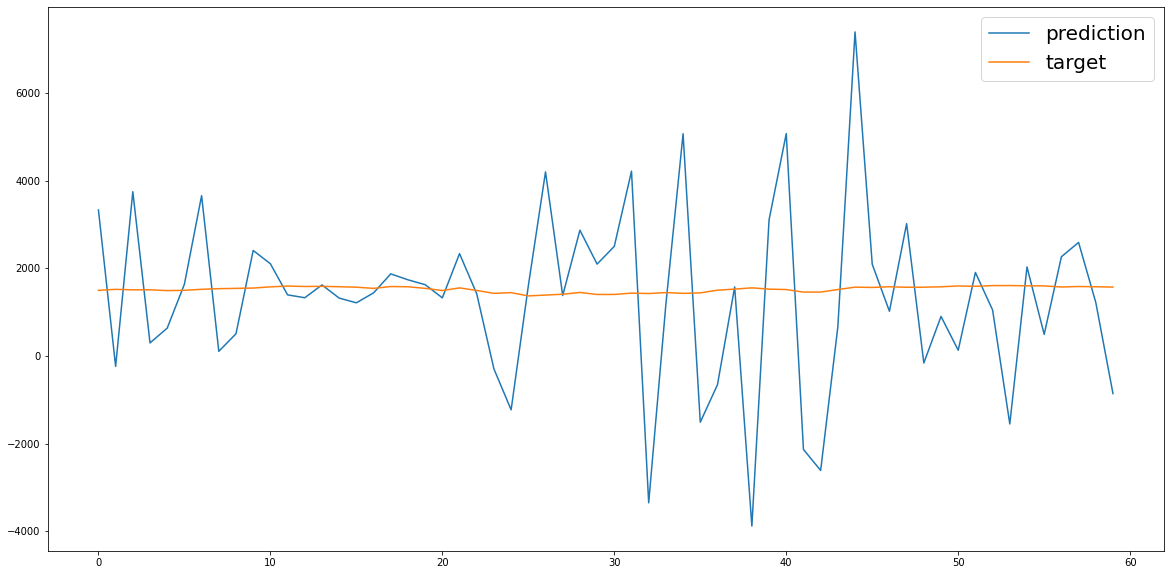

In [21]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(best_pred, label='prediction')
plt.plot(y_test, label='target')
plt.legend(loc='best', fontsize=20)
plt.show()

## Problem2. Regression Model
## -Covid Confirmed prediction.

In [22]:
#import covidall dataset 
train = pd.read_csv(file_path+'data/train.csv')
all_data = pd.read_csv(file_path+'data/covid_all.csv', index_col = 0) #set your working directory
all_data

,index,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,ForecastId,Day_num,Day,Month,Year,ConfirmedCases_1,ConfirmedCases_2,ConfirmedCases_3,ConfirmedCases_4,ConfirmedCases_5,ConfirmedCases_6,Fatalities_1,Fatalities_2,Fatalities_3,Fatalities_4,Fatalities_5,Fatalities_6,Trend_ConfirmedCases_1,Trend_ConfirmedCases_2,Trend_ConfirmedCases_3,Trend_ConfirmedCases_4,Trend_ConfirmedCases_5,Trend_ConfirmedCases_6,Trend_Fatalities_1,Trend_Fatalities_2,Trend_Fatalities_3,Trend_Fatalities_4,Trend_Fatalities_5,Trend_Fatalities_6,Population (2020),Density,Land Area,Med Age,Urban Pop
0,0,1.0,83,0,2020-01-22,0.0,0.0,-1.0,0,22,1,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
1,1,2.0,83,0,2020-01-23,0.0,0.0,-1.0,1,23,1,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
2,2,3.0,83,0,2020-01-24,0.0,0.0,-1.0,2,24,1,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
3,3,4.0,83,0,2020-01-25,0.0,0.0,-1.0,3,25,1,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
4,4,5.0,83,0,2020-01-26,0.0,0.0,-1.0,4,26,1,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35677,13454,-1.0,83,183,2020-05-10,0.0,0.0,13455.0,109,10,5,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14818157.0,38.0,386850.0,19.0,38.0
35678,13455,-1.0,83,183,2020-05-11,0.0,0.0,13456.0,110,11,5,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14818157.0,38.0,386850.0,19.0,38.0
35679,13456,-1.0,83,183,2020-05-12,0.0,0.0,13457.0,111,12,5,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14818157.0,38.0,386850.0,19.0,38.0
35680,13457,-1.0,83,183,2020-05-13,0.0,0.0,13458.0,112,13,5,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14818157.0,38.0,386850.0,19.0,38.0


In [23]:
country_dict = {'Afghanistan': 0,
 'Albania': 1,
 'Algeria': 2,
 'Andorra': 3,
 'Angola': 4,
 'Antigua and Barbuda': 5,
 'Argentina': 6,
 'Armenia': 7,
 'Australia': 8,
 'Austria': 9,
 'Azerbaijan': 10,
 'Bahamas': 11,
 'Bahrain': 12,
 'Bangladesh': 13,
 'Barbados': 14,
 'Belarus': 15,
 'Belgium': 16,
 'Belize': 17,
 'Benin': 18,
 'Bhutan': 19,
 'Bolivia': 20,
 'Bosnia and Herzegovina': 21,
 'Botswana': 22,
 'Brazil': 23,
 'Brunei': 24,
 'Bulgaria': 25,
 'Burkina Faso': 26,
 'Burma': 27,
 'Burundi': 28,
 'Cabo Verde': 29,
 'Cambodia': 30,
 'Cameroon': 31,
 'Canada': 32,
 'Central African Republic': 33,
 'Chad': 34,
 'Chile': 35,
 'China': 36,
 'Colombia': 37,
 'Congo (Brazzaville)': 38,
 'Congo (Kinshasa)': 39,
 'Costa Rica': 40,
 "Cote d'Ivoire": 41,
 'Croatia': 42,
 'Cuba': 43,
 'Cyprus': 44,
 'Czechia': 45,
 'Denmark': 46,
 'Diamond Princess': 47,
 'Djibouti': 48,
 'Dominica': 49,
 'Dominican Republic': 50,
 'Ecuador': 51,
 'Egypt': 52,
 'El Salvador': 53,
 'Equatorial Guinea': 54,
 'Eritrea': 55,
 'Estonia': 56,
 'Eswatini': 57,
 'Ethiopia': 58,
 'Fiji': 59,
 'Finland': 60,
 'France': 61,
 'Gabon': 62,
 'Gambia': 63,
 'Georgia': 64,
 'Germany': 65,
 'Ghana': 66,
 'Greece': 67,
 'Grenada': 68,
 'Guatemala': 69,
 'Guinea': 70,
 'Guinea-Bissau': 71,
 'Guyana': 72,
 'Haiti': 73,
 'Holy See': 74,
 'Honduras': 75,
 'Hungary': 76,
 'Iceland': 77,
 'India': 78,
 'Indonesia': 79,
 'Iran': 80,
 'Iraq': 81,
 'Ireland': 82,
 'Israel': 83,
 'Italy': 84,
 'Jamaica': 85,
 'Japan': 86,
 'Jordan': 87,
 'Kazakhstan': 88,
 'Kenya': 89,
 'Korea, South': 90,
 'Kosovo': 91,
 'Kuwait': 92,
 'Kyrgyzstan': 93,
 'Laos': 94,
 'Latvia': 95,
 'Lebanon': 96,
 'Liberia': 97,
 'Libya': 98,
 'Liechtenstein': 99,
 'Lithuania': 100,
 'Luxembourg': 101,
 'MS Zaandam': 102,
 'Madagascar': 103,
 'Malawi': 104,
 'Malaysia': 105,
 'Maldives': 106,
 'Mali': 107,
 'Malta': 108,
 'Mauritania': 109,
 'Mauritius': 110,
 'Mexico': 111,
 'Moldova': 112,
 'Monaco': 113,
 'Mongolia': 114,
 'Montenegro': 115,
 'Morocco': 116,
 'Mozambique': 117,
 'Namibia': 118,
 'Nepal': 119,
 'Netherlands': 120,
 'New Zealand': 121,
 'Nicaragua': 122,
 'Niger': 123,
 'Nigeria': 124,
 'North Macedonia': 125,
 'Norway': 126,
 'Oman': 127,
 'Pakistan': 128,
 'Panama': 129,
 'Papua New Guinea': 130,
 'Paraguay': 131,
 'Peru': 132,
 'Philippines': 133,
 'Poland': 134,
 'Portugal': 135,
 'Qatar': 136,
 'Romania': 137,
 'Russia': 138,
 'Rwanda': 139,
 'Saint Kitts and Nevis': 140,
 'Saint Lucia': 141,
 'Saint Vincent and the Grenadines': 142,
 'San Marino': 143,
 'Sao Tome and Principe': 144,
 'Saudi Arabia': 145,
 'Senegal': 146,
 'Serbia': 147,
 'Seychelles': 148,
 'Sierra Leone': 149,
 'Singapore': 150,
 'Slovakia': 151,
 'Slovenia': 152,
 'Somalia': 153,
 'South Africa': 154,
 'South Sudan': 155,
 'Spain': 156,
 'Sri Lanka': 157,
 'Sudan': 158,
 'Suriname': 159,
 'Sweden': 160,
 'Switzerland': 161,
 'Syria': 162,
 'Taiwan*': 163,
 'Tanzania': 164,
 'Thailand': 165,
 'Timor-Leste': 166,
 'Togo': 167,
 'Trinidad and Tobago': 168,
 'Tunisia': 169,
 'Turkey': 170,
 'US': 171,
 'Uganda': 172,
 'Ukraine': 173,
 'United Arab Emirates': 174,
 'United Kingdom': 175,
 'Uruguay': 176,
 'Uzbekistan': 177,
 'Venezuela': 178,
 'Vietnam': 179,
 'West Bank and Gaza': 180,
 'Western Sahara': 181,
 'Zambia': 182,
 'Zimbabwe': 183}

### <br/>Problem 2-1 Plot ' Spain' covid-Confiremedcases graph between march 1 to march 11.
- your completed graph doesn't have to be the same as the example.

Text(0, 0.5, 'Log ConfirmedCases')

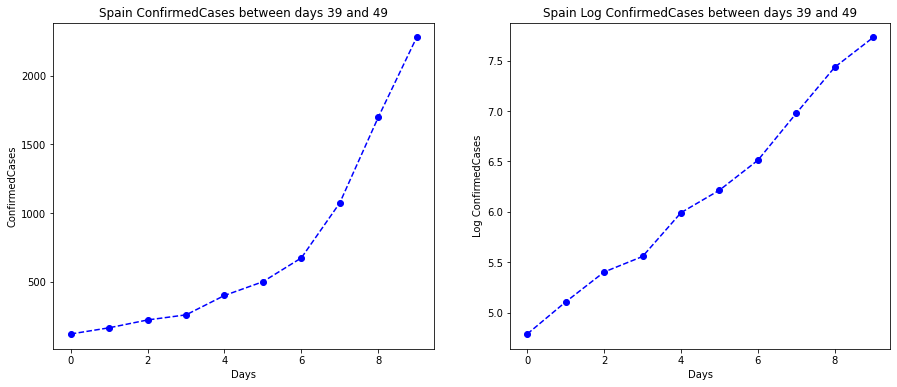

In [24]:

# plot 'Spain' covid-Confiremedcases graph between march 1 to march 11.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

###To do####  
y1 = all_data[(all_data['Country_Region']==country_dict['Spain']) & (all_data['Day_num']>39) & (all_data['Day_num']<=49)][['ConfirmedCases']]
x1 = range(0, len(y1))
ax1.plot(x1, y1, 'bo--')
ax1.set_title("Spain ConfirmedCases between days 39 and 49")
ax1.set_xlabel("Days")
ax1.set_ylabel("ConfirmedCases")

y2 = all_data[(all_data['Country_Region']==country_dict['Spain']) & (all_data['Day_num']>39) & (all_data['Day_num']<=49)][['ConfirmedCases']].apply(lambda x: np.log(x))
x2 = range(0, len(y2))
ax2.plot(x2, y2, 'bo--')
ax2.set_title("Spain Log ConfirmedCases between days 39 and 49")
ax2.set_xlabel("Days")
ax2.set_ylabel("Log ConfirmedCases")

## To do ###
##apply log transform to y variables ## 


In [25]:
##don`t touch this cell##

# Filter selected features
data = all_data.copy()
features = ['Id', 'ForecastId', 'Country_Region', 'Province_State', 'ConfirmedCases', 'Fatalities', 
       'Day_num']
data = data[features]

# Apply log transformation to all ConfirmedCases and Fatalities columns, except for trends
data[['ConfirmedCases', 'Fatalities']] = data[['ConfirmedCases', 'Fatalities']].astype('float64')
data[['ConfirmedCases', 'Fatalities']] = data[['ConfirmedCases', 'Fatalities']].apply(lambda x: np.log1p(x))

# Replace infinites
data.replace([np.inf, -np.inf], 0, inplace=True)


### <br/>Problem 2-2  complete below function to  Split data into train/test and apply linear regression

In [26]:
# Split data into train/test
def split_data(df, train_lim, test_lim):
    
    df.loc[df['Day_num']<=train_lim , 'ForecastId'] = -1
    df = df[df['Day_num']<=test_lim]
    
    ##To do ## for Train set 
    x_train = df[df.ForecastId == -1].drop(['ConfirmedCases', 'Fatalities'], axis=1)
    y_train_1 = df[df.ForecastId == -1]['ConfirmedCases']
    y_train_2 = df[df.ForecastId == -1]['Fatalities']

    ##To do ## for  Test set
    x_test = df[df.ForecastId != -1].drop(['ConfirmedCases', 'Fatalities'], axis=1)

    
    x_train.drop('Id', inplace=True, errors='ignore', axis=1)
    x_train.drop('ForecastId', inplace=True, errors='ignore', axis=1)
    x_test.drop('Id', inplace=True, errors='ignore', axis=1)
    x_test.drop('ForecastId', inplace=True, errors='ignore', axis=1)
    
    return x_train, y_train_1, y_train_2, x_test


# Linear regression model
def lin_reg(X_train, Y_train, X_test):
    ##To do ##   Create linear regression object
    regr = linear_model.LinearRegression()

    ## To do ##  Train the model using the training sets
    regr.fit(X_train, Y_train)

    # To do ## Make predictions using the testing set
    y_pred = regr.predict(X_test)
    
    return regr, y_pred




In [27]:
##don`t touch this cell##
dates_list = ['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', 
                 '2020-03-10', '2020-03-11','2020-03-12','2020-03-13','2020-03-14','2020-03-15','2020-03-16','2020-03-17','2020-03-18',
                 '2020-03-19','2020-03-20','2020-03-21','2020-03-22','2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', 
                 '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05', 
                 '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14','2020-04-15','2020-04-16','2020-04-17','2020-04-18','2020-04-19',
                '2020-04-20','2020-04-21','2020-04-22','2020-04-23','2020-04-24','2020-04-25','2020-04-26','2020-04-27','2020-04-28','2020-04-29','2020-04-30',
                '2020-05-01','2020-05-02','2020-05-03','2020-05-04','2020-05-05','2020-05-06','2020-05-07','2020-05-08','2020-05-09','2020-05-10','2020-05-11',
                '2020-05-12','2020-05-13','2020-05-14','2020-05-15']
def plot_linreg_basic_country(data, country_name, dates_list, day_start, shift, train_lim, test_lim):
    
    data_country = data[data['Country_Region']==country_dict[country_name]]
    data_country = data_country.loc[data_country['Day_num']>=day_start]
    X_train, Y_train_1, Y_train_2, X_test = split_data(data_country, train_lim, test_lim)
    model, pred = lin_reg(X_train, Y_train_1, X_test)

    # Create a df with both real cases and predictions (predictions starting on March 12th)
    X_train_check = X_train.copy()
    X_train_check['Target'] = Y_train_1

    X_test_check = X_test.copy()
    X_test_check['Target'] = pred

    X_final_check = pd.concat([X_train_check, X_test_check])

    # Select predictions from March 1st to March 25th
    predicted_data = X_final_check.loc[(X_final_check['Day_num'].isin(list(range(day_start, day_start+len(dates_list)))))].Target
    real_data = train.loc[(train['Country_Region']==country_name) & (train['Date'].isin(dates_list))]['ConfirmedCases']
    dates_list_num = list(range(0,len(dates_list)))

    # Plot results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

    ax1.plot(dates_list_num, np.expm1(predicted_data))
    ax1.plot(dates_list_num, real_data)
    ax1.axvline(30-shift, linewidth=2, ls = ':', color='grey', alpha=0.5)
    ax1.legend(['Predicted cases', 'Actual cases', 'Train-test split'], loc='upper left')
    ax1.set_xlabel("Day count (from March " + str(1+shift) + " to March 25th)")
    ax1.set_ylabel("Confirmed Cases")

    ax2.plot(dates_list_num, predicted_data)
    ax2.plot(dates_list_num, np.log1p(real_data))
    ax2.axvline(30-shift, linewidth=2, ls = ':', color='grey', alpha=0.5)
    ax2.legend(['Predicted cases', 'Actual cases', 'Train-test split'], loc='upper left')
    ax2.set_xlabel("Day count (from March " + str(1+shift) + " to March 30th)")
    ax2.set_ylabel("Log Confirmed Cases")

    plt.suptitle(("ConfirmedCases predictions based on Log-Lineal Regression for "+country_name))

### <br/>Problem 2-3  using above function'plot_linreg_basic_country' run the Linear Regression workflow
 - your completed graph doesn't have to be the same as the example.


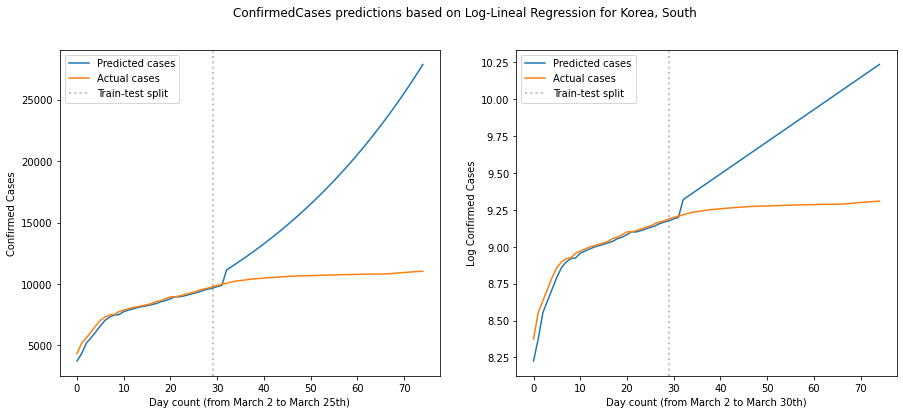

In [28]:
## To do ##  

country_name = "Korea, South"
march_day = 1
day_start = 38+march_day
dates_list2 = dates_list[march_day:]
train_lim, test_lim = 70, 113
plot_linreg_basic_country(data, country_name, dates_list2, day_start, march_day, train_lim, test_lim)

### <br/>Problem 2-4 Describe the significance and limitations of the graph above.

### YOUR ANSWER HERE ###
target values(y)를 scale하기 전 값은 overfitting이 발생했다(왼쪽). train-test split을 전후로 actual cases와 predicted cases는 경향이 다르다. train-test split 전, 즉 train set에 대해서는 loss 값을 줄이는데 성공하여 예측값과 실제 값이 거의 일치한다. 그러나, train-test split 이후 즉 test set에 대해서는 예측값과 실제값의 차이, loss가 급격히 커진다. 이는 train loss는 낮고, test loss는 높은 high variance에 해당하는 overfitting 현상이다. <br><br>

target value에 log를 적용해도 이러한 overfitting 현상은 사라지지 않았다(오른쪽). target value가 scaling이 적용되었음에도 scaling을 적용하기 전과 같이 train loss는 낮고, test loss는 높은 high variance 현상이 발생했음을 확인할 수 있다.
<br><br>

따라서 현재 그래프에서 보여지는 상황을 해결하려면 예측 모델이 가진 파라미터들의 영향력을 줄일 수 있도록 regularization을 추가하거나, 파라미터의 개수를 줄여야한다.



## 3. Caculating Stringency Indexes of six countries 

Reference : https://www.bsg.ox.ac.uk/sites/default/files/Calculation%20and%20presentation%20of%20the%20Stringency%20Index.pdf

Look at the document above and learn about Stringency Index (not legacy stringency index!!)

## 3-1 Data filtering

In [29]:
#load csv file you care ("OxCGRT_latest.csv")

###YOUR CODE HERE###
ox = pd.read_csv(file_path + "data/OxCGRT_latest.csv")
ox.head()

,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay
0,Aruba,ABW,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,Aruba,ABW,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,Aruba,ABW,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,Aruba,ABW,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,Aruba,ABW,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [30]:
#Filter rows with six unique countries by 'CountryName'
#('CountryName' == Australia, China, Japan, New Zealand, Singapore, South Korea)
###YOUR CODE HERE###
CountryName = ['Australia', 'China', 'Japan', 'New Zealand', 'Singapore', 'South Korea']
ox_filtered = ox[ox['CountryName'].isin(CountryName)]
ox_filtered.head()

,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay
947,Australia,AUS,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
948,Australia,AUS,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
949,Australia,AUS,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
950,Australia,AUS,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
951,Australia,AUS,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
#Drop columns you don't need
#print dataframe you care about
###YOUR CODE HERE###
ox_filtered = ox_filtered[['CountryName', 'Date', 'C1_School closing', 'C1_Flag', 'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events','C3_Flag',\
'C4_Restrictions on gatherings','C4_Flag','C5_Close public transport','C5_Flag','C6_Stay at home requirements','C6_Flag',\
'C7_Restrictions on internal movement','C7_Flag','C8_International travel controls','H1_Public information campaigns','H1_Flag']]
print(ox_filtered.head())
#use columns : 
"""
['CountryName', 'Date', 'C1_School closing', 'C1_Flag', 'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events','C3_Flag',
'C4_Restrictions on gatherings','C4_Flag','C5_Close public transport','C5_Flag','C6_Stay at home requirements','C6_Flag',
'C7_Restrictions on internal movement','C7_Flag','C8_International travel controls','H1_Public information campaigns','H1_Flag']
"""

    CountryName      Date  ...  H1_Public information campaigns  H1_Flag
947   Australia  20200101  ...                              0.0      NaN
948   Australia  20200102  ...                              0.0      NaN
949   Australia  20200103  ...                              0.0      NaN
950   Australia  20200104  ...                              0.0      NaN
951   Australia  20200105  ...                              0.0      NaN

[5 rows x 19 columns]


"\n['CountryName', 'Date', 'C1_School closing', 'C1_Flag', 'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events','C3_Flag',\n'C4_Restrictions on gatherings','C4_Flag','C5_Close public transport','C5_Flag','C6_Stay at home requirements','C6_Flag',\n'C7_Restrictions on internal movement','C7_Flag','C8_International travel controls','H1_Public information campaigns','H1_Flag']\n"

## 3-2 Calculating Stringency Index

you can use some pakages to deal with 'nan' values

In [32]:
#stringency calculation
#step1 : calculate weight for a policy of general scope
###YOUR CODE HERE###
INDICATORS = ['C1_School closing','C2_Workplace closing','C3_Cancel public events','C4_Restrictions on gatherings','C5_Close public transport','C6_Stay at home requirements','C7_Restrictions on internal movement','H1_Public information campaigns', 'C8_International travel controls']
max_val = {col : max_val for col, max_val in zip(INDICATORS[:-1], [3, 3, 2, 4, 2, 3, 2, 2])}
weight = 0 
for val in max_val.values() :
    weight += 1 / (val + 1)
weight = weight / 8
weight

0.28541666666666665

In [33]:
#step2 : calculate sub-indices
#calculate C1-C9, G1-G8, and I1-I9 
###YOUR CODE HERE###
str_idx = ox_filtered.copy()
SUBINDEX = ['I1','I2','I3','I4','I5','I6','I7','I8']
str_idx.fillna(0, inplace=True)
for col,subin in zip(INDICATORS[:-1], SUBINDEX):
    sub_index = 100 * (str_idx[col] * ((1 - weight) / max_val[col]) + weight * (str_idx[col[:2]+'_Flag']))
    str_idx[subin] = sub_index

str_idx['I9'] = 100 * (str_idx[INDICATORS[-1]]/4)
str_idx

,CountryName,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,H1_Public information campaigns,H1_Flag,I1,I2,I3,I4,I5,I6,I7,I8,I9
947,Australia,20200101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
948,Australia,20200102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
949,Australia,20200103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
950,Australia,20200104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
951,Australia,20200105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17720,Singapore,20200510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17721,Singapore,20200511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17722,Singapore,20200512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17723,Singapore,20200513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
#step3 : calculate stringency index I (up to 2 decimal points)
###YOUR CODE HERE###
ALL_SUB = SUBINDEX + ['I9']
stringency_index = round((str_idx[ALL_SUB].sum(axis = 1))/9, 2)

In [43]:
#step4 : make your stingency index array into dataframe(column name = 'my_StringencyIndex') and concat it(axis = 1) to the result of 1-1 
###YOUR CODE HERE###
stridx = pd.DataFrame(columns = ['my_Stringency'], data = stringency_index)
stridx.loc[ox_filtered[INDICATORS].notna().sum(axis = 1) < 6, 'my_Stringency'] = None #If fewer than six policy indicators have data on a given day, the index calculation is rejected and no value is returned. 

result = pd.concat([ox_filtered, stridx], axis = 1)
result

,CountryName,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,H1_Public information campaigns,H1_Flag,my_Stringency
947,Australia,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
948,Australia,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
949,Australia,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
950,Australia,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
951,Australia,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17720,Singapore,20200510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17721,Singapore,20200511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17722,Singapore,20200512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17723,Singapore,20200513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Problem4. Topic Modeling (Clustering analysis of documents) for tweets related to COVID-19
A **topic model** is a type of statistical model for discovering the abstract "topics" that occur in a collection of documents.
 Please refer to [wikipedia](https://en.wikipedia.org/wiki/Topic_model#:~:text=In%20machine%20learning%20and%20natural,structures%20in%20a%20text%20body.) for detailed information.
- These documents were crawled from *twitter* with some *COVID-19* related keywords . All tweets are in English but have a lot of noisy information.
- In this problem, your goal is to cluster tweets according to the latent 'topics' with the statistical method, automatically. 


### Load the csv file using pandas library

In [45]:
df = pd.read_csv(file_path + 'data/covid_twitter.csv', index_col = 0) #set your working directory
text_en = df['text']
print(df.shape)
print(df.head())

(36121, 1)
                                                 text
6   .@PatriceHarrisMD spoke with @YahooFinance abo...
14  #CoronaUpdate | Johns Hopkins University has s...
17  Singapore donates 40,000 test kits to the Phil...
28  Lockdowns, drones: Will things ever go back to...
30  Does the #COVID19 pandemic have you feeling ou...


### Problem 4-1 Text Preprocessing
First of all, you should process the documents so that the model will not be perturbed by the noisy information

**a. Remove the following characters with *'re'* module in each tweets**
- special characters ( # @ , . | ? ! )
- *COVID* relavant words (COVID19, coronavirus, coronaoutbreak)

In [46]:
### YOUR CODE HERE ###
NOISES = ['#+','@',',+','\.+','\|+','\?+','!+', '\n', '&amp','\*','\$','[0-9]+th','[0-9]+', '_+', '-+', 'covid','coronavirus','coronaoutbreak', '“', '”', '‘','’' ,"'", '"']
PARENTHESIS = ['“.+”','\".+\"','\(.+\)','\[.+\]','{.+}', "'.+'" , '‘.+’']
emoji = []
removed_text = []
text_en = text_en.astype(str)
text_list = text_en.values
for text in text_list:
    return_text = text.lower()
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE) 
    return_text = emoji_pattern.sub(r' ', return_text)
    for par in PARENTHESIS:
      while True:
        m = re.search(par, return_text)
        if not m :
          break
        return_text = return_text[:m.start()] + ' ' + return_text[m.start()+1:m.end()-1] + ' ' + return_text[m.end():]
        return_text = return_text.replace('  ',' ')

    for noise in NOISES:
        while True:
          m = re.search(noise, return_text)
          if not m :
              break
          return_text = return_text[:m.start()] + ' '+ return_text[m.end():]
          return_text = return_text.replace('  ',' ')        

    removed_text.append(return_text)

**b. Remove the *stop words* in each tweets**

*Stop words* are words which should be filtered out before given to the model. Please refer to [wikipedia](https://en.wikipedia.org/wiki/Stop_words#:~:text=In%20SEO%20terminology%2C%20stop%20words,save%20space%20in%20their%20databases.) for detailed information 
- First, you should download the stop word set from *nltk* module.

In [47]:
### NLP toolkit ###
import nltk
from nltk.corpus import stopwords

In [48]:
### Download the set with this
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [49]:
### check the set with this
stop_words = set(stopwords.words('english'))
print(stop_words)

{'nor', 'll', 'himself', 'were', 'his', 'all', 'been', "needn't", 'down', 'about', 'during', 'at', 'any', 'have', 'be', 'between', 'didn', 's', 'an', 'the', 'y', 'own', 'am', "should've", 'don', 'me', 'needn', 'with', 'does', 'once', 'if', 'each', 'which', 'whom', 'above', 've', "you've", 'from', 'but', 'had', 'not', 'under', 'did', 'then', 'same', 'that', 'mightn', 'has', 'than', 'hers', 'very', 'in', 'through', "you'll", "haven't", 'itself', 'why', 'shouldn', 'just', 'themselves', "weren't", 'some', 'hadn', 'your', 'mustn', 'yours', 'doesn', 'ain', 'after', 'their', 'herself', 'these', 'will', 'a', 'no', 'or', 'is', 'yourselves', 'of', 'by', 'how', 'where', "you're", 'most', "didn't", "don't", "wouldn't", "that'll", 'you', 'against', 'here', 'so', 'i', 'm', 'into', 'should', "couldn't", 'was', 'shan', "hadn't", 'he', 'myself', 'few', 'wouldn', 'd', 'ours', 'while', 'being', 'aren', "doesn't", 'we', "wasn't", 'couldn', 'wasn', 're', 'having', 'those', 'our', "mightn't", 'and', "you'd"

**a. Update your set with some stop words which are not needed for modeling, you think.**

In [50]:
### YOUR CODE HERE ###
Mysw = ['you', 'us', 'people','help','outbreak', 'please', 'lockdown','pm','one', 'get', 'new','need','health', 'could','may','time', 'day', 'pandemic', 'trump']
for word in Mysw:
  stop_words.add(word)
print(stop_words)

{'nor', 'people', 'll', 'himself', 'were', 'day', 'his', 'all', 'been', "needn't", 'down', 'about', 'during', 'at', 'any', 'time', 'have', 'be', 'between', 'didn', 's', 'an', 'the', 'y', 'own', 'am', 'pandemic', "should've", 'don', 'me', 'needn', 'with', 'does', 'once', 'need', 'help', 'if', 'each', 'which', 'whom', 'above', 've', "you've", 'from', 'health', 'but', 'had', 'not', 'under', 'did', 'then', 'same', 'that', 'mightn', 'has', 'than', 'hers', 'very', 'in', 'through', "you'll", "haven't", 'itself', 'why', 'shouldn', 'just', 'themselves', "weren't", 'some', 'hadn', 'new', 'your', 'mustn', 'yours', 'doesn', 'ain', 'outbreak', 'after', 'their', 'herself', 'these', 'will', 'a', 'no', 'or', 'is', 'yourselves', 'of', 'by', 'how', 'pm', 'where', "you're", 'most', "didn't", "don't", "wouldn't", "that'll", 'you', 'against', 'here', 'so', 'i', 'm', 'one', 'into', 'should', "couldn't", 'was', 'please', 'shan', "hadn't", 'he', 'myself', 'few', 'wouldn', 'd', 'trump', 'ours', 'while', 'being

**b. Remove stop words from the tweet dataset with your own stop words set**

In [51]:
### YOUR CODE HERE ###
text_nosw = []
for text in removed_text:
    tokens = text.split(' ')
    tokens_nostop = [tok for tok in tokens if tok not in stop_words]
    result_text = ' '.join(tokens_nostop)
    result_text = result_text.replace('  ',' ')
    text_nosw.append(result_text)

### Problem 4-2 Convert the documents to a tf-idf matrix 

*TF-IDF* is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. Please refer to [this](http://mlwiki.org/index.php/TF-IDF)
- Please use the results of 3-1, not the results of 3-2
- Print your tf-idf matrix after converting it into *pandas.DataFrame* format
- Set your own hyperparams.

In [52]:
### scikit learn ###
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
### YOUR CODE HERE ###
vectorizer = TfidfVectorizer(max_features=150)

X = vectorizer.fit_transform(text_nosw)
tf_idf = pd.DataFrame(X.todense())
tf_idf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.693903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.395492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.473507,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.722762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Problem 4-3 Cluster the tf-idf matrix of tweets using the *K-Means* algorithm.
- Set your own hyperparams

In [54]:
### scikit learn ###
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

**a. Find an optimal value for the number of clusters using the *elbow method***
- Draw the SSD(Sum of the Squared Distance) of *K-Means* algorithm by the number of clusters, K, as shown in the example


Example
![image.png](attachment:image.png)

In [55]:
from tqdm import tqdm_notebook

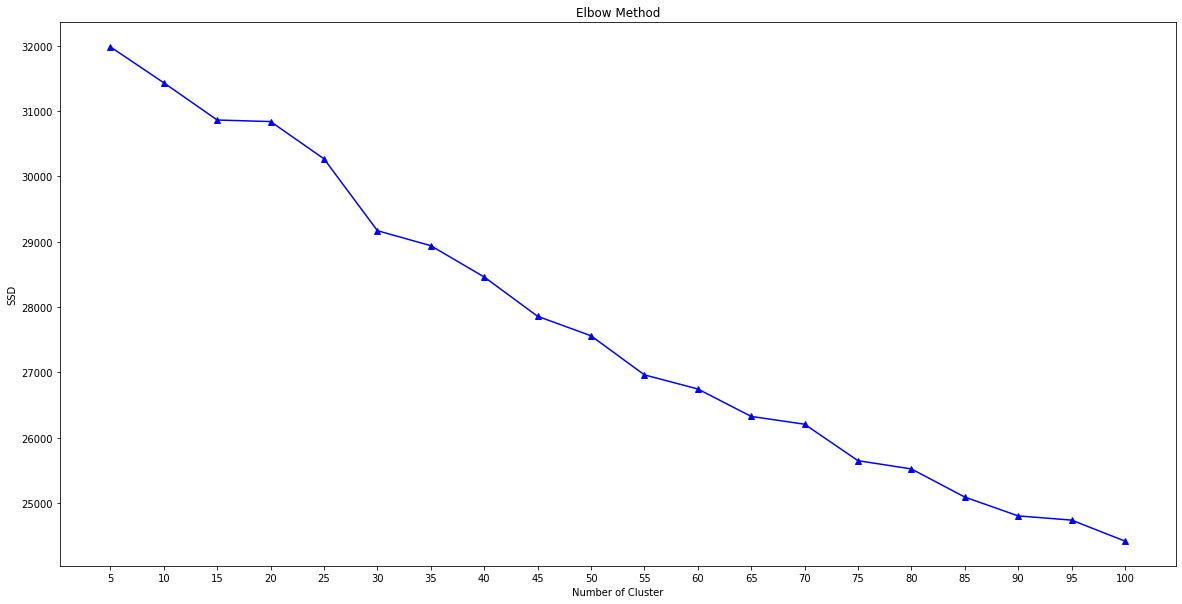

In [56]:
### YOUR CODE HERE ###
Dist = []
for K in tqdm_notebook(range(5,101,5)):
    kmeans = MiniBatchKMeans(n_clusters = K, 
                             random_state = 41,
                             batch_size = 128).fit(tf_idf.values)
    distance = 0
    for point, label in zip(tf_idf.values, kmeans.labels_):
        distance += np.linalg.norm(kmeans.cluster_centers_[label] - point)
    Dist.append(distance)


plt.figure(figsize = (20,10))    
plt.plot([i for i in range(5, 101,5)], Dist, color = 'b', marker = '^')
plt.xticks(ticks = [i for i in range(5, 101, 5)])
plt.xlabel("Number of Cluster")
plt.ylabel("SSD")
plt.title("Elbow Method")
plt.show()

**b. Based on the plot, pick a proper value for K and justify why.**

It is OK that you can't find any proper value for K. But, specify why.

**### YOUR DESCRIPTION HERE ###**
 
 

적당한 cluster 개수를 결정하기 위해서는, MSE를 관찰해야한다. 여기서는 SSD 값을 관찰하여 적당한 cluster 개수를 결정할 수 있다. 데이터 포인트로부터 그들이 속하는 center까지의 거리의 합은 cluster 개수가 증가함에 따라 감소해야한다. 꾸준히 감소 추세를 보이다가, 적당한 cluster 개수인 지점을 지나면 SSD 감소 폭이 줄어드는 지점(decrease slowly)을 찾아야한다. 이때 그 지점이 이전이 적당한 cluster 개수이다.<br>


위 그래프에서는 cluster 개수가 15가 되는 지점에서 SSD의 감소 폭이 줄어들었다. 따라서 10개 이상, 15개 미만에서 cluster 개수를 지정하는 것이 적절하다.

### Problem 4-4 Visualize your clusters to evaluate the results of clustering analysis.

**a. Assgin the cluster index for each tweet with K=14**
- In other words, predict the label for each example

In [57]:
### YOUR CODE HERE ###
kmeans = MiniBatchKMeans(n_clusters = 14, random_state = 41, batch_size = 128).fit(tf_idf.values)
label_14 = kmeans.labels_

**b. Fill the function in below, which visualizes your clusters with PCA and TSNE**

Both *PCA* and *TSNE* are the most common visualization techniques in the machine learning community. It is usually known that TSNE could capture the non-linear relationship between datapoints. For more detailed information, please refer to [this](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)
- At first, this function randomly selects some samples for fitting PCA, depending on your device's capability.
- Get the PCA matrices from the results of 4-2(tf-idf matrix) where the number of principal components is 2, each.
- For TSNE, you can use the *TSNE().fit_transform()* function. 

Example
![image.png](attachment:image.png)

In [58]:
### visualization methods ###
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
### for plotting ###
import matplotlib.cm as cm

In [59]:
def plot_tsne_pca(data, labels):
    '''
    This function plots the PCA and t-SNE on 2D plane.
    args:
        data: tf-idf weight matrix
        labels: predictions from K-means
    '''
    # initial set up and random pick up samples
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=2000, replace=False)
    
    ######################## YOUR CODE HERE ########################
    '''
    pca (2000 x 2) : extract 2 eigenvectors that have the most explained variance
    tsne (2000 x 2) : feed the 50 principal components to t-SNE
    '''

    pca = PCA(n_components = 2).fit_transform(data[max_items, ])
    tsne =  TSNE().fit_transform(data[max_items, ])
    
    #################################################################
    
    # random pick certain size of data points for visiualization
    idx = np.random.choice(range(pca.shape[0]), size=400, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    # plot PCA
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster')
    
    # plot t-SNE
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster')

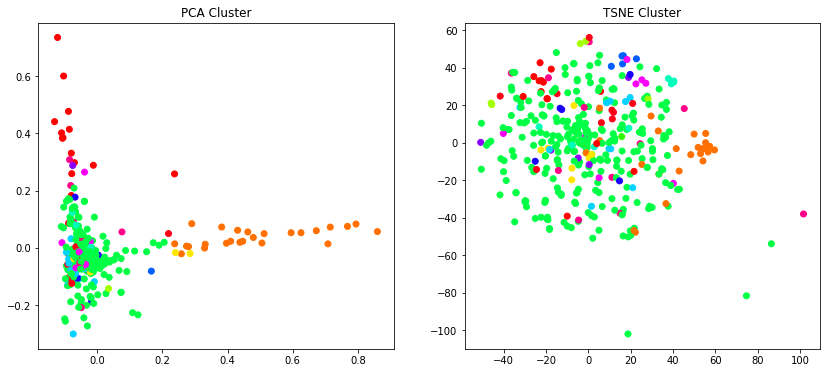

In [60]:
### YOUR CODE HERE ###
# plot PCA and t-SNE reduced data with above function
plot_tsne_pca(tf_idf.values,label_14)

### Problem 4-5 Extract keywords from each clusters

**a. get the top keywords from each clusters you've got from 4-4 (a.) based on the tf-idf matrix values**

- Use the function in below or make your own function to achieve the same goal with this function.

Example
![image.png](attachment:image.png)

In [61]:
def get_top_keywords(data, clusters, labels, n_terms=10):
    '''
    This function displays the top keywords based on tf-idf score.
    data = tf-idf array
    clusters = assigned cluster index
    labels = vectorizer.get_feature_names()
    n_terms = top n keywords
    '''
    #  based on predictions
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    # loop through each clusters and print top 10 score words
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))

In [62]:
### YOUR CODE HERE ###
get_top_keywords(data = X,
                 clusters = label_14,
                labels = vectorizer.get_feature_names())


Cluster 0
today,lives,working,stayathomeandstaysafe,go,keep,spread,safe,stay,home

Cluster 1
update,today,reports,death,reported,number,confirmed,total,deaths,cases

Cluster 2
doctors,going,world,still,even,like,crisis,know,lives,many

Cluster 3
spread,measures,public,make,family,keep,others,take,part,protect

Cluster 4
like,care,country,ppe,days,coronaupdate,world,know,death,every

Cluster 5
know,stayathomeandstaysafe,spread,fight,virus,today,coronaupdate,like,world,china

Cluster 6
free,many,go,coronaupdate,today,crisis,due,support,workers,food

Cluster 7
working,state,like,live,world,public,medical,workers,response,crisis

Cluster 8
cases,positive,coronaupdate,today,media,realdonaldtrump,latest,breaking,good,news

Cluster 9
hospital,spread,died,first,death,workers,quarantine,china,cases,city

Cluster 10
good,medical,many,public,testing,would,world,like,thank,much

Cluster 11
spread,state,tested,home,positive,days,coronaupdate,stayathomeandstaysafe,self,quarantine

Cluster 12
crisis

**b. According to the keywords selected from (a.), describe the differences between clusters or guess the topic of tweets in the specific cluster**

**### YOUR DESCRIPTION HERE ###**

Cluster 0
today,lives,working,stayathomeandstaysafe,go,keep,spread,safe,stay,home<br>
코로나 확진을 막기 위해 집에서 나가지 말자는 내용의 트윗

Cluster 1
update,today,reports,death,reported,number,confirmed,total,deaths,cases<br>
코로나 사태로 인한 확진자, 사망자 정보 등을 매일 업데이트 하는 트윗

Cluster 2
doctors,going,world,still,even,like,crisis,know,lives,many<br>
의사에 대해서 언급하는 트윗

Cluster 3
spread,measures,public,make,family,keep,others,take,part,protect<br>
코로나 전염을 막고 가족고 다른 사람을 지켜야한다는 내용의 트윗

Cluster 4
like,care,country,ppe,days,coronaupdate,world,know,death,every<br>
전세계 나라별 코로나 사망자에 대한 트윗

Cluster 5
know,stayathomeandstaysafe,spread,fight,virus,today,coronaupdate,like,world,china<br>
stayathome 운동을 알리면서 동시에 코로나 상황을 업데이트하는 트윗

Cluster 6
free,many,go,coronaupdate,today,crisis,due,support,workers,food<br>
코로나 업데이트 관련 트윗. workers, food 등에 관련된 내용은 판데믹 사태에 대한 내용으로 보임

Cluster 7
working,state,like,live,world,public,medical,workers,response,crisis<br>
코로나 사태에 대응하는 medical 종사자들에 대해 다루는 내용의 트윗

Cluster 8
cases,positive,coronaupdate,today,media,realdonaldtrump,latest,breaking,good,news<br>
코로나 상황을 업데이트 하는 트윗. 확진자 위주(양성 반응)로 다룬다.

Cluster 9
hospital,spread,died,first,death,workers,quarantine,china,cases,city<br>
병원, 격리로 보아 코로나 의심/확진으로 인해 병원에 격리된 내용을 다루는 트윗

Cluster 10
good,medical,many,public,testing,would,world,like,thank,much<br>
코로나에 대처하는 medical 종업자에 대한 감사와 응원의 트윗

Cluster 11
spread,state,tested,home,positive,days,coronaupdate,stayathomeandstaysafe,self,quarantine<br>
코로나 관련 내용을 업데이트하며 코로나 확산을 막기 위해집에서 나가지 말자(stayathomeandstaysafe)는 내용의 태그를 남기는 트윗

Cluster 12
crisis,staff,safe,care,go,together,thank,home,workers,work<br>
코로나 사태에도 일하는 staff들에 대한 응원과 감사의 트윗

Cluster 13
together,uk,working,government,community,fight,response,workers,crisis,support<br>
지역 사회/정부가 힘을 합쳐 코로나 사태에 대응해야한다는 내용의 트윗
<br><br>
크게 코로나 사태를 업데이트하는 트윗(1,4,5,6,8,9,11), 의료계 종사자들에 대한 응원과 감사(2,7,10,12), stayathome을 통해 코로나 확산을 막자는 내용의 트윗(0,3,5,11)으로 나뉜다. 마지막으로 지역 사회와 정부가 힘을 합쳐 코로나에 대응하자는 트윗(13)이 있다.
<br>
코로나 사태를 업데이트 하는 트윗은 대부분 statyathome에 대해서도 동시에 언급하는 경향이 있으며(5, 11), 의료계 종사자들에 대한 감사와 격려의 트윗은 stayathome을 언급하지 않고 감사와 격려의 내용만을 다루는 경향이 있다.



### End of HW4 ###
Thanks for all your works